## Fetal lung B cell development 
<br>
<b>Description</b> : In this notebook we plot the markers genes patterns of B cell at different developmental stages. We also plot the heatmap of beta 
coefficients between Tregs and B cells from cell-cell interaction output (beta) of fetal lung datasets (Figure 5d). <br>
<b>Author</b> : Hejin Huang (huang.hejin@gene.com)<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

/raid/home/huangh83/miniforge3/envs/tangram2/lib/python3.11/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
sns.reset_defaults()

In [3]:
# Load annotated single-cell data
ad_sc_all = sc.read_h5ad('../../data/original/fetallung/sc/'
                         + '220715Annotated_Fetal_lung_immune_filtered_soupxcite_cxg.h5ad')

# Normalize and log-transform the data
sc.pp.normalize_total(ad_sc_all, target_sum=1E4)
sc.pp.log1p(ad_sc_all)

In [4]:
# Define B-cell splits and markers
B_split = ['HSC/MPP', 'LMPP/ELP', 'Pre-pro-B',  'Pro-B', 'Late pro-B', 'Pro-B/Pre-B transition','Large pre-B', 'κ small pre-B', 'λ small pre-B', 
          'Late pre-B','Immature B', 'CD5+ Mature B', 'CD5- Mature B']

B_marker = ['CD34', 'EBF1', 'SPINK2','VPREB1', 'DNTT', 'NEIL1', 'RAG1', 'MS4A1', 'IL7R', 'MKI67','SPIB', 'IGKC', 'IGLC2', 'IGLC3',
            'IGLL1','IGHD','IGHM','VPREB3', 'BEST3', 'CD5','CD27', 'SPN', 'CCR10', 'CCL22', 'PRDM1']

In [5]:
# Filter single-cell AnnData object for B-cell types (creates a view by default)
ad_sc_B = ad_sc_all[ad_sc_all.obs.celltype.isin(B_split)].copy() # Use .copy() if you intend to modify ad_sc_B independently later

# Ensure celltype is a categorical for groupby operations
ad_sc_B.obs['celltype'] = ad_sc_B.obs['celltype'].astype('category')
ad_sc_B.obs['celltype'] = ad_sc_B.obs['celltype'].cat.set_categories(B_split) # Ensure order


In [6]:
def plot_dotplot(adata, var_names, groupby, categories_order=None, vmin=0, vmax=1.2, **kwargs):
    """
    Generates and displays a Scanpy dot plot.

    Args:
        adata: AnnData object.
        var_names: List of gene names to plot.
        groupby: Key for grouping observations (e.g., 'celltype').
        categories_order: Order of categories for the groupby axis.
        vmin, vmax: Min and max values for color scaling.
        kwargs: Additional arguments for sc.pl.dotplot.
    """
    sc.pl.dotplot(adata, var_names, groupby=groupby, categories_order=categories_order,
                  vmin=vmin, vmax=vmax, show=False, **kwargs) # show=False to control display externally
    plt.show()


In [7]:
def plot_heatmap(df, title="", cmap='bwr', center=0, vmin=-3.0, vmax=3.0):
    """
    Generates and displays a seaborn heatmap.

    Args:
        df: DataFrame to plot.
        title: Title of the heatmap.
        cmap: Colormap.
        center, vmin, vmax: Color scaling parameters.
    """
    plt.figure(figsize=(16, 8))
    sns.heatmap(df, cmap=cmap, center=center, vmin=vmin, vmax=vmax, linewidths=1, linecolor='grey')
    plt.title(title, fontsize=20) # Added a title for clarity
    plt.yticks(rotation=0, fontsize=16)
    plt.xticks(fontsize=16, rotation=-90) # Adjusted rotation and alignment
    plt.show()

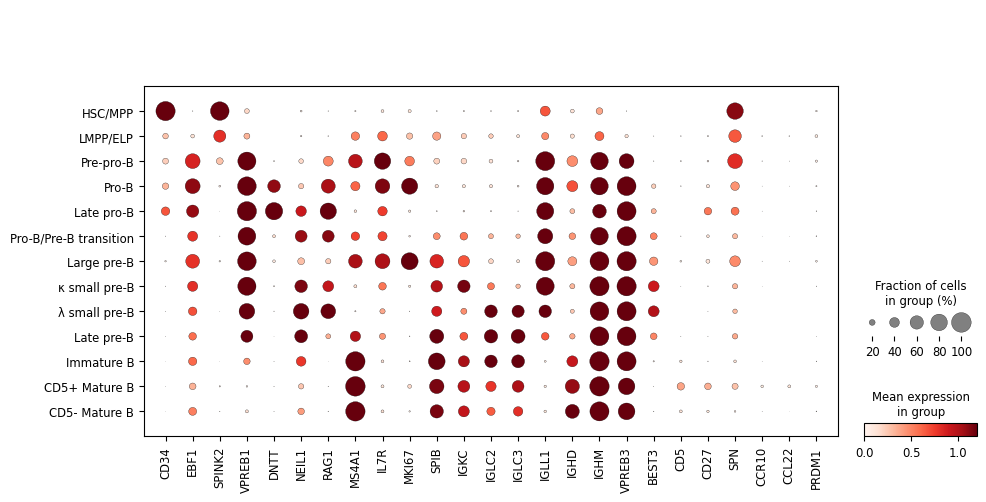

In [8]:
# Dot plot for B-cell markers
plot_dotplot(ad_sc_B, B_marker, groupby='celltype', categories_order=B_split)


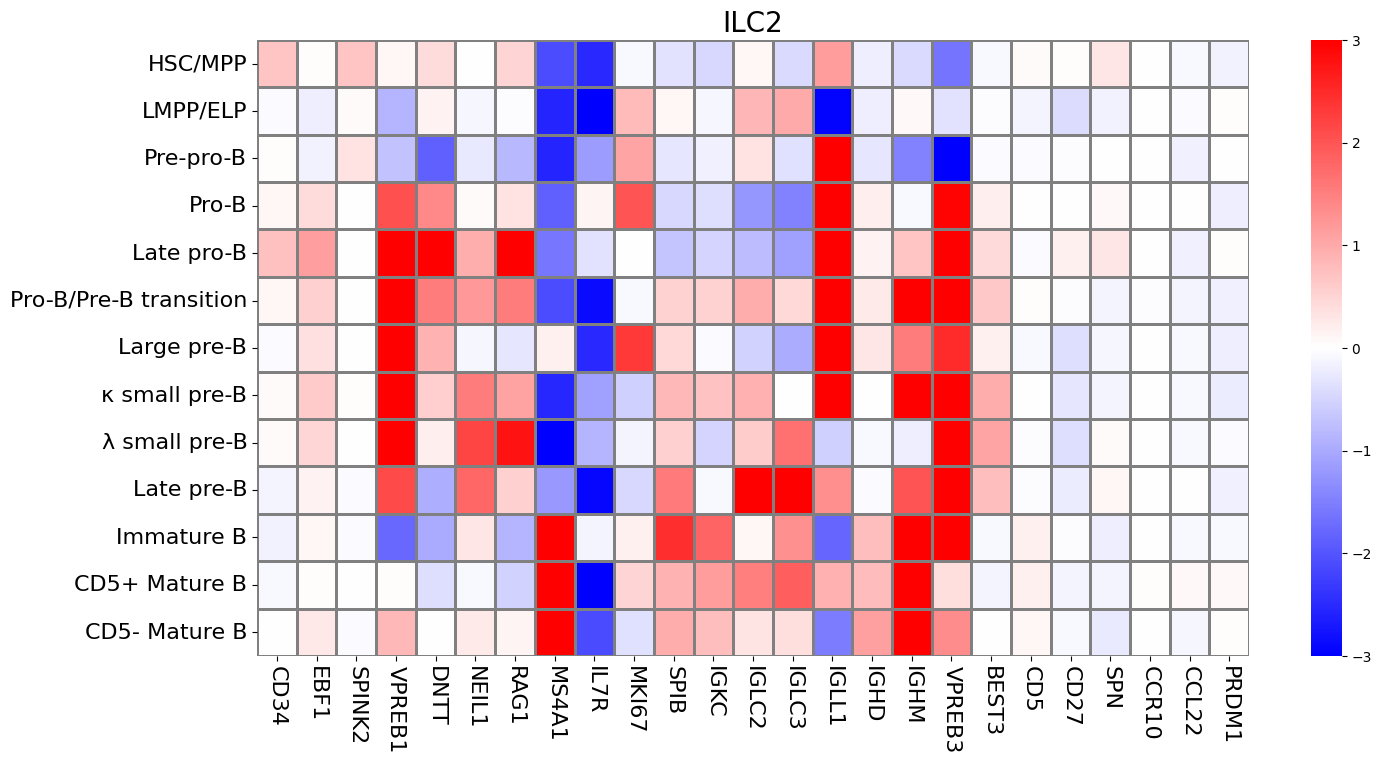

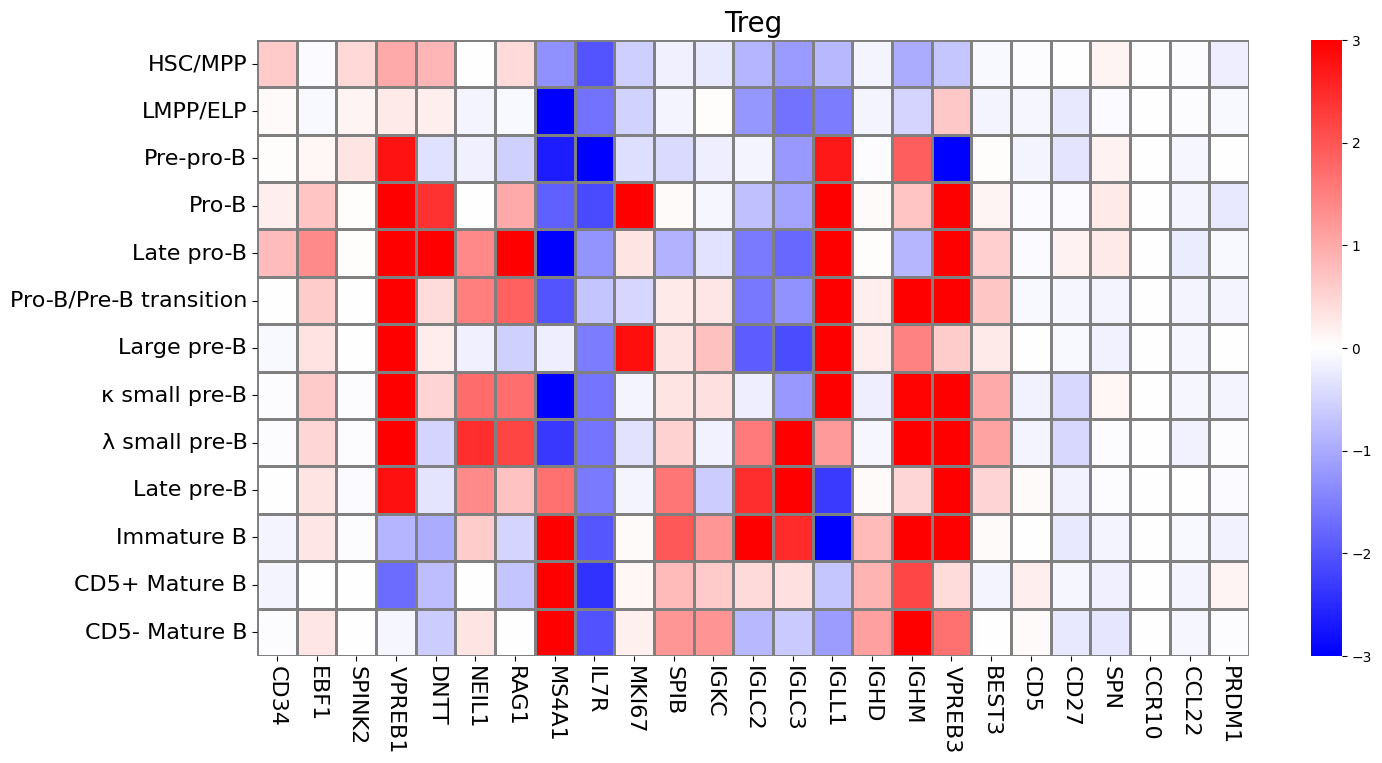

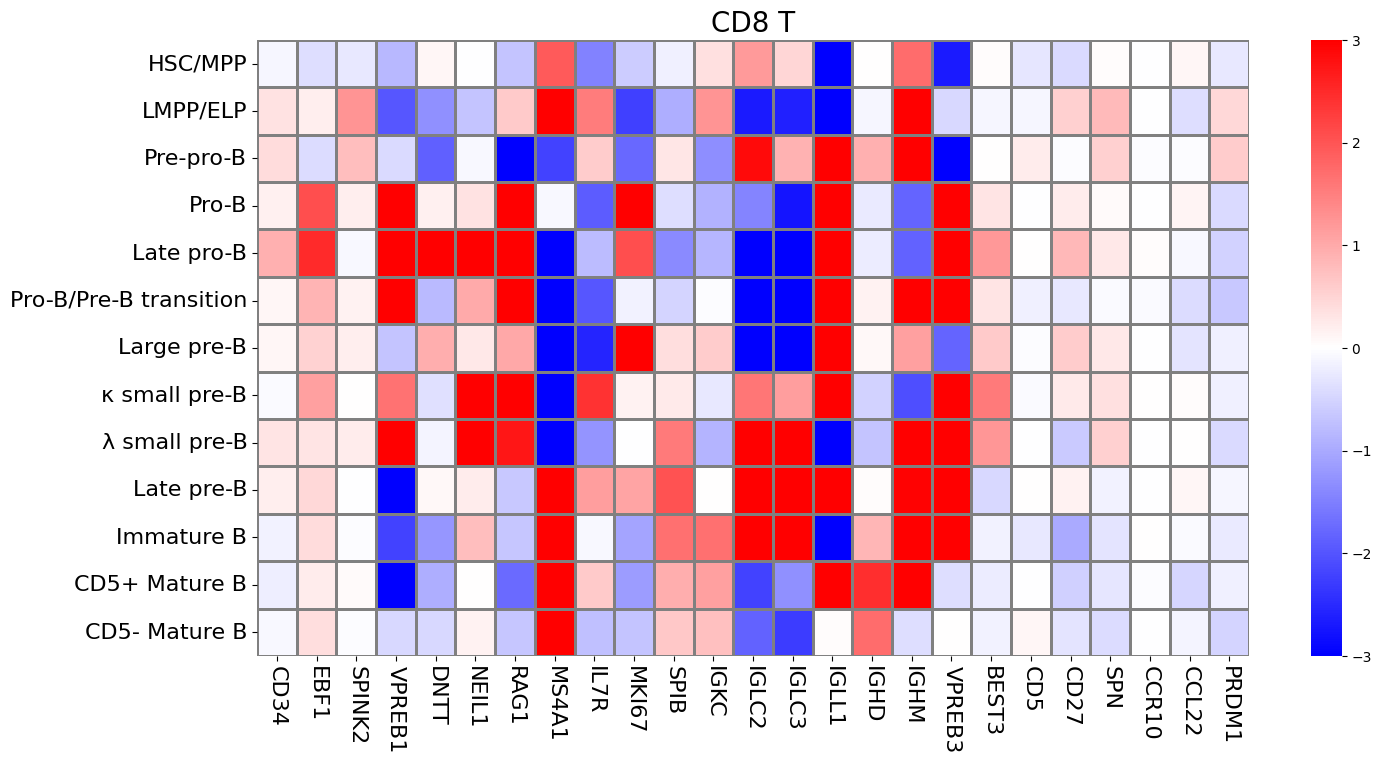

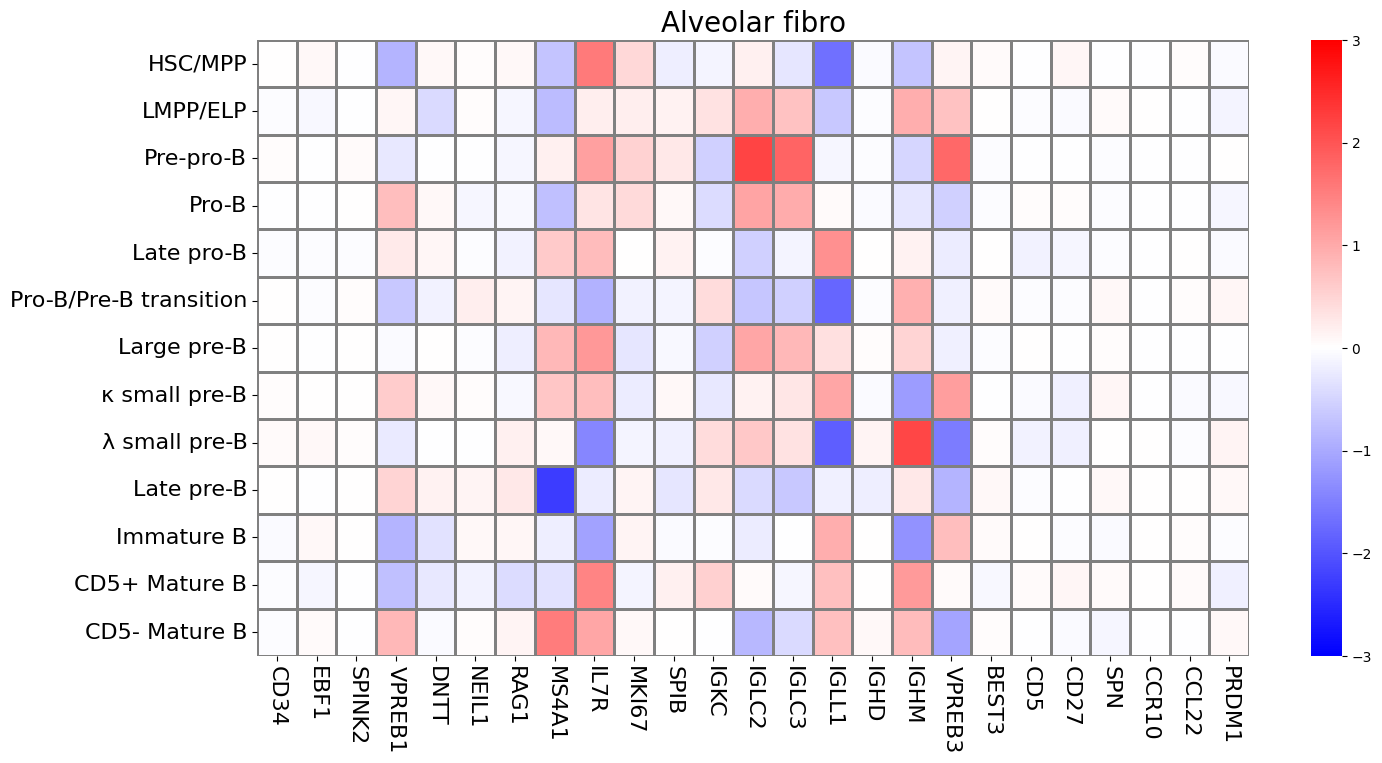

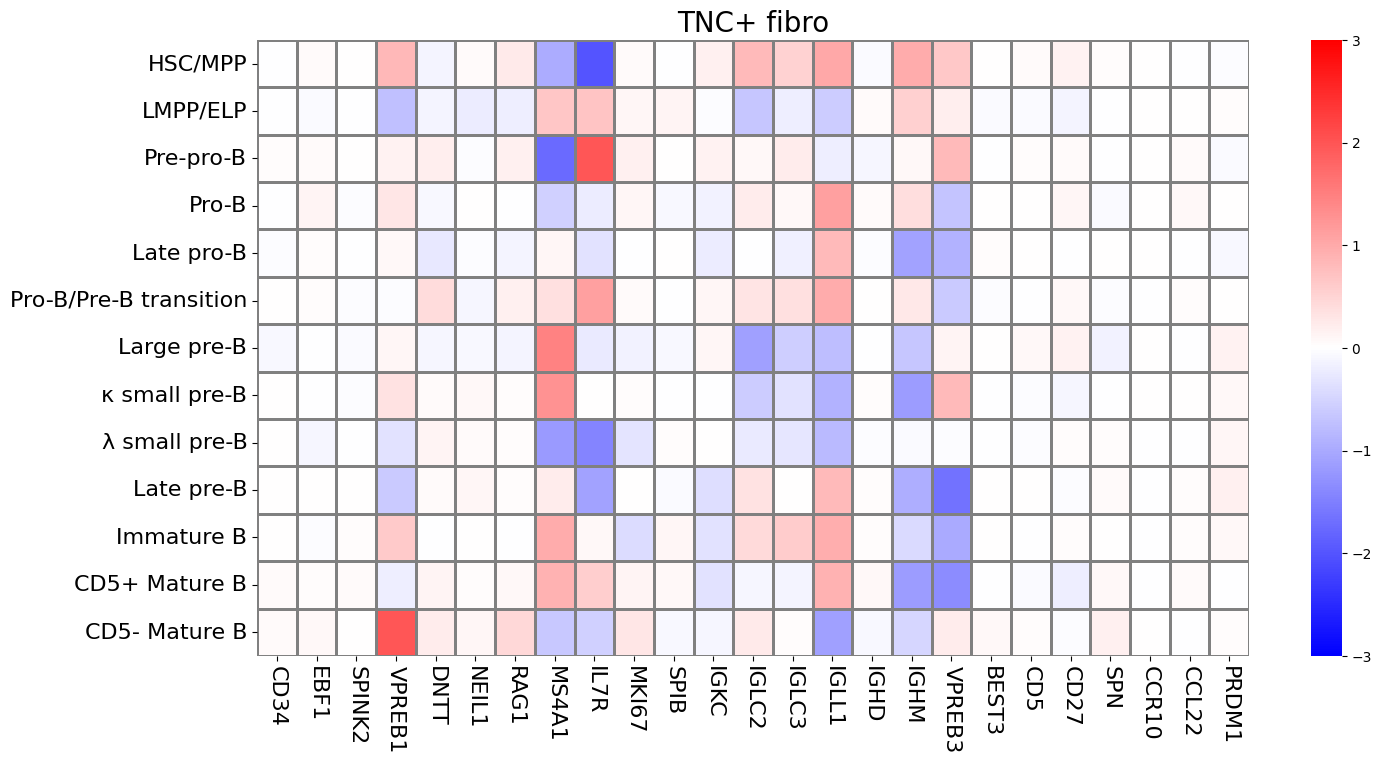

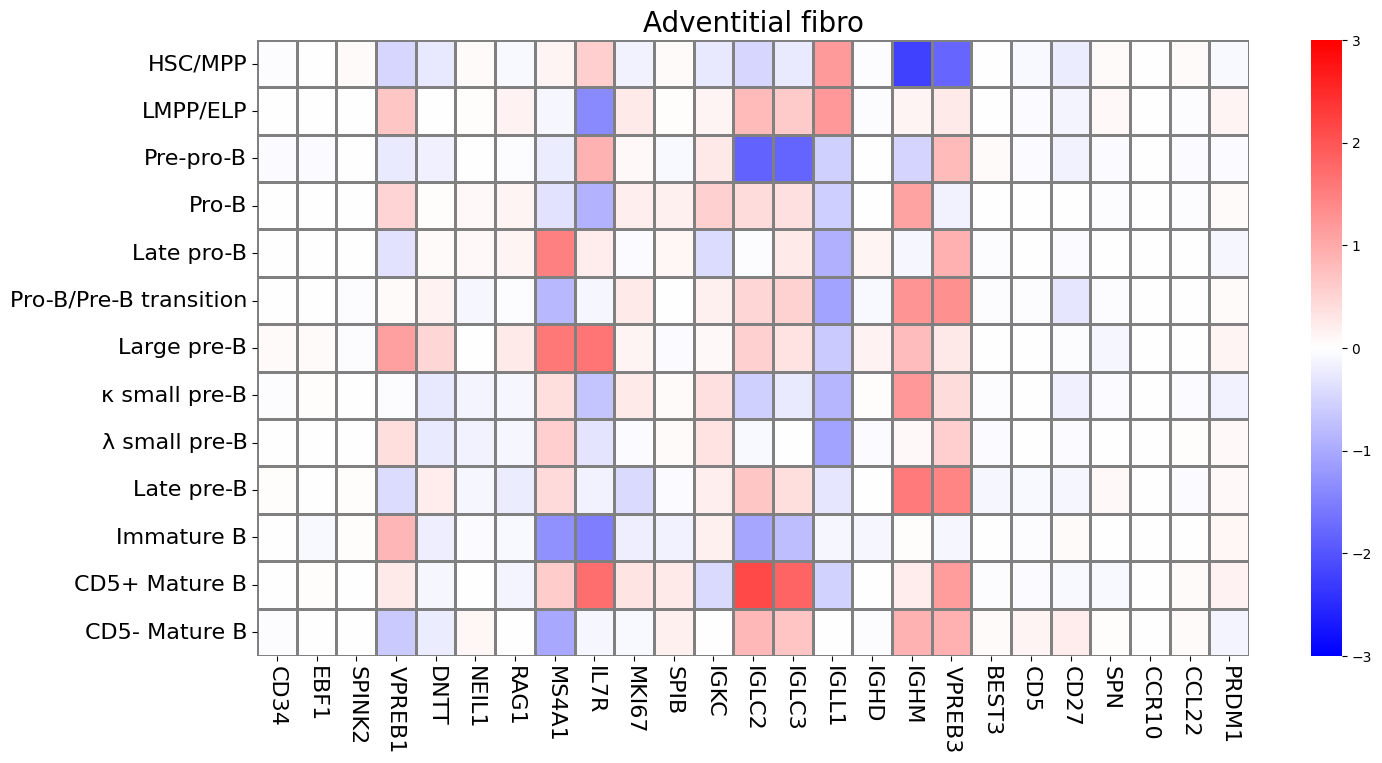

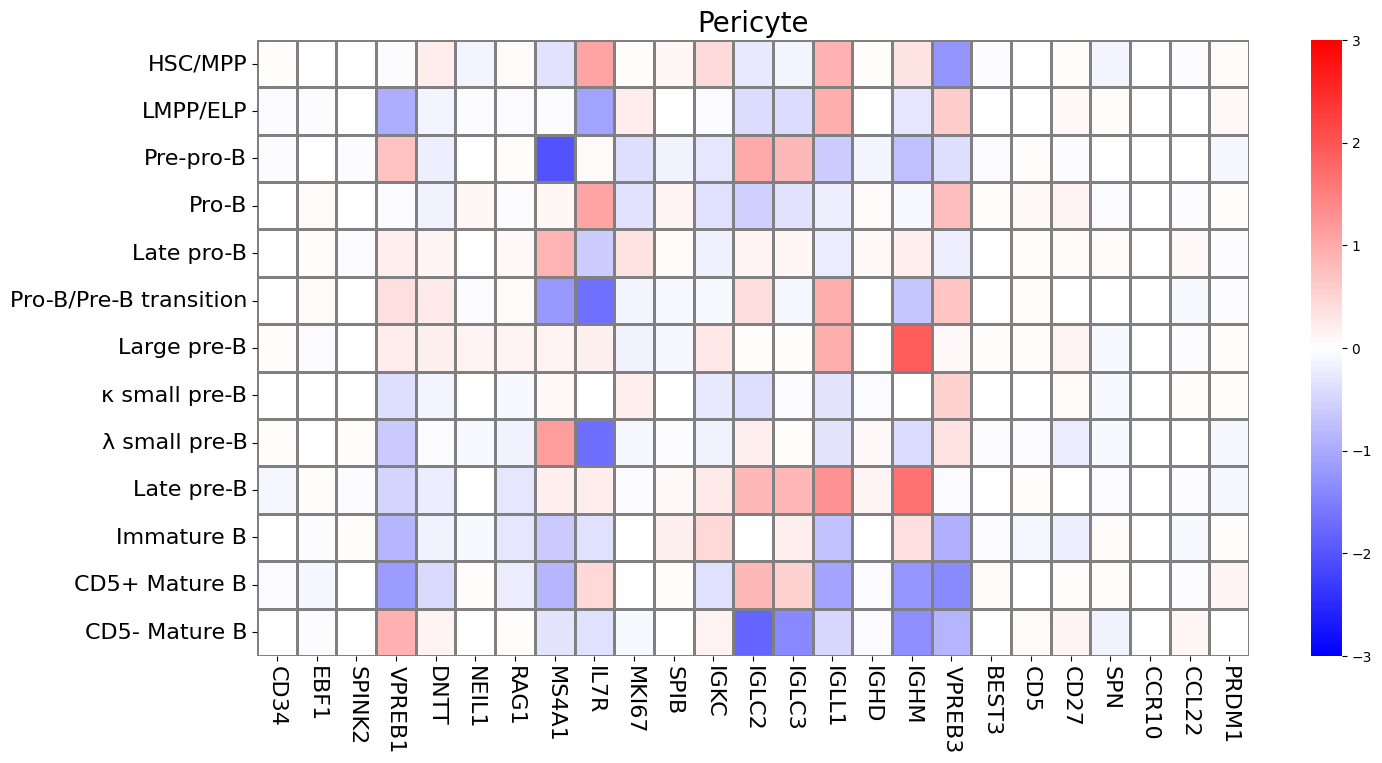

In [11]:
# Define example cell types and folder for comparison data
example_celltype = ['ILC2', 'Treg', 'CD8 T', 'Alveolar fibro', 'TNC+ fibro', 'Adventitial fibro', 'Pericyte']
folder = '../../data/analysis/fetal_lung/'

# Generate and display heatmaps for cell-cell communication comparison
for celltype in example_celltype:
    comparison_df = pd.read_csv(folder + 'B_development/' + celltype + '.csv', index_col=0)
    plot_heatmap(comparison_df, title=f"{celltype}", vmin=-3.0, vmax=3.0)